In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open("cafe_list.json", "r") as file:
    cafe_json = json.load(file)

In [3]:
cafe_df = pd.DataFrame(cafe_json)
#delete unnecessary column
cafe_df = cafe_df.drop(columns=["Website","Email", "Cabang: "], axis=1)
cafe_df.head()

,name,alamat,spend_range,overall_rating,Tipe Kuliner,Jam Buka,Pembayaran,Kapasitas:,facility,Rasa,Suasana,Harga : rasa,Pelayanan,Kebersihan
0,Jenderal Kopi Nusantara Buwas,"Jl. LLRE Martadinata No. 219, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.45,Kafe,"Senin - Kamis (10:00 - 22:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Go-pay, Ovo",200 kursi,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.7,3.8,4.7,4.6
1,Bonfire,"Jl. LLRE Martadinata No. 137, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.55,Barat,Senin - Minggu (10:00 - 22:00)\n\nBelum Buka,"Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.8,4.5,4.4,4.4
2,Hachi Grill,"Jl. Prof. Dr. Sutami No. 56, Sarijadi, Bandung",Di atas Rp. 200.000,4.66,Jepang,"Senin - Jumat (11:00 - 21:00), Sabtu - Minggu ...","Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.6,4.5,4.8,4.7
3,Roemah Legit,"Jl. Embong No. 15, Naripan, Bandung",Rp. 50.000 - Rp. 100.000,4.31,Indonesia,"Senin - Kamis (07:00 - 21:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Ovo",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,3.8,4.4,4.5
4,Myboo.Kit Cafe and Playground,"Jl. Bukit Pakar Timur No. 2, Dago Atas, Bandung",Rp. 50.000 - Rp. 100.000,4.29,Kafe,Senin - Minggu (08:00 - 23:00)\n\nBelum Buka,"Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,4.1,4.4,4.0


## EDA

In [4]:
cafe_df["area"] = cafe_df["alamat"].str.split(",", expand=True)[1]
cafe_df["area"] = cafe_df["area"].str.strip()
cafe_df.head()

,name,alamat,spend_range,overall_rating,Tipe Kuliner,Jam Buka,Pembayaran,Kapasitas:,facility,Rasa,Suasana,Harga : rasa,Pelayanan,Kebersihan,area
0,Jenderal Kopi Nusantara Buwas,"Jl. LLRE Martadinata No. 219, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.45,Kafe,"Senin - Kamis (10:00 - 22:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Go-pay, Ovo",200 kursi,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.7,3.8,4.7,4.6,Riau
1,Bonfire,"Jl. LLRE Martadinata No. 137, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.55,Barat,Senin - Minggu (10:00 - 22:00)\n\nBelum Buka,"Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.8,4.5,4.4,4.4,Riau
2,Hachi Grill,"Jl. Prof. Dr. Sutami No. 56, Sarijadi, Bandung",Di atas Rp. 200.000,4.66,Jepang,"Senin - Jumat (11:00 - 21:00), Sabtu - Minggu ...","Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.6,4.5,4.8,4.7,Sarijadi
3,Roemah Legit,"Jl. Embong No. 15, Naripan, Bandung",Rp. 50.000 - Rp. 100.000,4.31,Indonesia,"Senin - Kamis (07:00 - 21:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Ovo",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,3.8,4.4,4.5,Naripan
4,Myboo.Kit Cafe and Playground,"Jl. Bukit Pakar Timur No. 2, Dago Atas, Bandung",Rp. 50.000 - Rp. 100.000,4.29,Kafe,Senin - Minggu (08:00 - 23:00)\n\nBelum Buka,"Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana",NaN,"[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,4.1,4.4,4.0,Dago Atas


In [5]:
nan_count = cafe_df.isna().sum()
print(nan_count)
cafe_df = cafe_df.drop(columns="Kapasitas: ", axis=1)
cafe_df.head()

name                 0
alamat               0
spend_range          0
overall_rating       0
Tipe Kuliner        43
Jam Buka            40
Pembayaran           1
Kapasitas:        1419
facility             0
Rasa                 0
Suasana              0
Harga : rasa         0
Pelayanan            0
Kebersihan           0
area                 0
dtype: int64


,name,alamat,spend_range,overall_rating,Tipe Kuliner,Jam Buka,Pembayaran,facility,Rasa,Suasana,Harga : rasa,Pelayanan,Kebersihan,area
0,Jenderal Kopi Nusantara Buwas,"Jl. LLRE Martadinata No. 219, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.45,Kafe,"Senin - Kamis (10:00 - 22:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Go-pay, Ovo","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.7,3.8,4.7,4.6,Riau
1,Bonfire,"Jl. LLRE Martadinata No. 137, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.55,Barat,Senin - Minggu (10:00 - 22:00)\n\nBelum Buka,"Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.8,4.5,4.4,4.4,Riau
2,Hachi Grill,"Jl. Prof. Dr. Sutami No. 56, Sarijadi, Bandung",Di atas Rp. 200.000,4.66,Jepang,"Senin - Jumat (11:00 - 21:00), Sabtu - Minggu ...","Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.6,4.5,4.8,4.7,Sarijadi
3,Roemah Legit,"Jl. Embong No. 15, Naripan, Bandung",Rp. 50.000 - Rp. 100.000,4.31,Indonesia,"Senin - Kamis (07:00 - 21:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Ovo","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,3.8,4.4,4.5,Naripan
4,Myboo.Kit Cafe and Playground,"Jl. Bukit Pakar Timur No. 2, Dago Atas, Bandung",Rp. 50.000 - Rp. 100.000,4.29,Kafe,Senin - Minggu (08:00 - 23:00)\n\nBelum Buka,"Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,4.1,4.4,4.0,Dago Atas


In [6]:
# tes_eda = cafe_df.iloc[1]["Jam Buka"].split("\n\n")[0]
cafe_df["Jam Buka"] = cafe_df["Jam Buka"].str.split("\n\n", expand=True)[0]

#change each number column with float data type
cafe_df["overall_rating"]= cafe_df["overall_rating"].astype(float)
cafe_df["Rasa"]= cafe_df["Rasa"].astype(float)
cafe_df["Suasana"]= cafe_df["Suasana"].astype(float)
cafe_df["Harga : rasa"]= cafe_df["Harga : rasa"].astype(float)
cafe_df["Pelayanan"]= cafe_df["Pelayanan"].astype(float)
cafe_df["Kebersihan"]= cafe_df["Kebersihan"].astype(float)

cafe_df.head()

,name,alamat,spend_range,overall_rating,Tipe Kuliner,Jam Buka,Pembayaran,facility,Rasa,Suasana,Harga : rasa,Pelayanan,Kebersihan,area
0,Jenderal Kopi Nusantara Buwas,"Jl. LLRE Martadinata No. 219, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.45,Kafe,"Senin - Kamis (10:00 - 22:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Go-pay, Ovo","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.7,3.8,4.7,4.6,Riau
1,Bonfire,"Jl. LLRE Martadinata No. 137, Riau, Bandung",Rp. 100.000 - Rp. 200.000,4.55,Barat,Senin - Minggu (10:00 - 22:00),"Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.8,4.5,4.4,4.4,Riau
2,Hachi Grill,"Jl. Prof. Dr. Sutami No. 56, Sarijadi, Bandung",Di atas Rp. 200.000,4.66,Jepang,"Senin - Jumat (11:00 - 21:00), Sabtu - Minggu ...","Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.7,4.6,4.5,4.8,4.7,Sarijadi
3,Roemah Legit,"Jl. Embong No. 15, Naripan, Bandung",Rp. 50.000 - Rp. 100.000,4.31,Indonesia,"Senin - Kamis (07:00 - 21:00), Jumat - Sabtu (...","Tunai, Visa, Master, Debet, Ovo","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,3.8,4.4,4.5,Naripan
4,Myboo.Kit Cafe and Playground,"Jl. Bukit Pakar Timur No. 2, Dago Atas, Bandung",Rp. 50.000 - Rp. 100.000,4.29,Kafe,Senin - Minggu (08:00 - 23:00),"Tunai, Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.4,4.5,4.1,4.4,4.0,Dago Atas


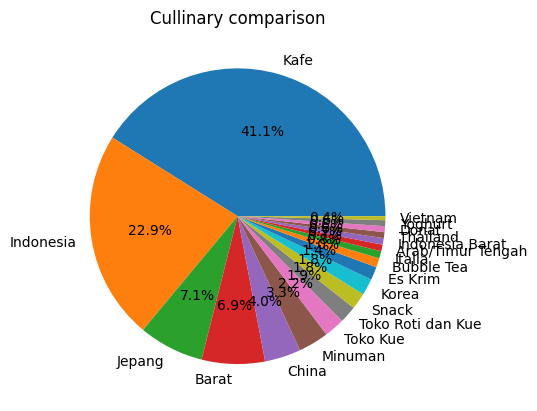

In [7]:
cullinary_type = cafe_df["Tipe Kuliner"].value_counts().head(19).to_frame()

cullinary_type.reset_index(inplace=True)
cullinary_type.head()

fig, ax = plt.subplots()
ax.pie(cullinary_type["Tipe Kuliner"], labels=cullinary_type["index"], autopct='%1.1f%%')

# ax.pie(cullinary_type["Tipe Kuliner"], labels=cullinary_type["index"])

ax.set_title("Cullinary comparison")

plt.show()

In [8]:
# TASK:
# -Group by cafe based on area
# -Compare each cafe which has more rating in each category
# -Find cafe that completely indoor, semi-outdoor
# -Find cafe that has applied full cashless method
# -categorize each cafe by there spend_range(<100,100-200, >200)/Person
# -find what type of cullinary in each area mostly had
# -find which cafe in each area that have earliest and latest operation time

In [9]:
# cafe_area["index"] = cafe_area["index"].str.strip()

## show area with most cafes available

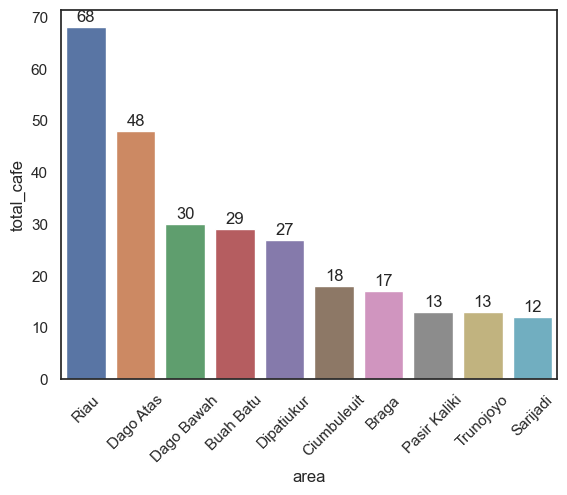

In [10]:
#take resto with type cafe only and get top 10 most running cafe in each area
cafe_only = cafe_df[cafe_df["Tipe Kuliner"]=="Kafe"]
cafe_by_area = cafe_only["area"].value_counts().to_frame()
cafe_area = cafe_by_area[cafe_by_area["area"]>=5]
cafe_area.reset_index(inplace=True)
cafe_area = cafe_area.head(10)

#create barplot
sns.set(style="white")
ax = sns.barplot(x=cafe_area["index"], y=cafe_area["area"])

# add custom text labels to the bar with rotation
for i,v in enumerate(cafe_area["area"]):
    ax.text(i, v+1, v, ha="center")

#add x-axis label
# plt.xlabel("area")
ax.set_xlabel("area")
ax.set_ylabel("total_cafe")

#rotate x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# plt.show()
plt.show()

## Show cafe with highest rating for each category in each area with most available cafe

['Riau', 'Dago Atas', 'Dago Bawah', 'Buah Batu', 'Dipatiukur', 'Ciumbuleuit', 'Braga', 'Pasir Kaliki', 'Trunojoyo', 'Sarijadi']


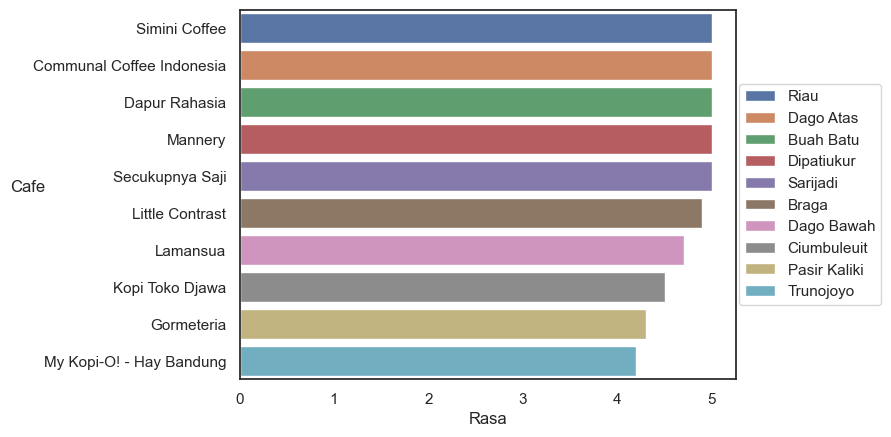

In [11]:
#cafe highest rating in each category and each top area
list_top10 = list(cafe_area["index"])
print(list_top10)


# area_cafe = cafe_only.groupby("area")["overall_rating"].agg('mean').round(2)
cafe_riau = cafe_only[cafe_only["area"]=="Riau"]
highest_rating = {}
highest_rating["rasa"] = cafe_riau.loc[cafe_riau["Rasa"].idxmax()]
highest_rating["suasana"] = cafe_riau.loc[cafe_riau["Suasana"].idxmax()]
highest_rating["harga:rasa"] = cafe_riau.loc[cafe_riau["Harga : rasa"].idxmax()]
highest_rating["pelayanan"] = cafe_riau.loc[cafe_riau["Pelayanan"].idxmax()]
highest_rating["Kebersihan"] = cafe_riau.loc[cafe_riau["Kebersihan"].idxmax()]
highest_rating

rating = []
for val in list_top10:
    cafe = cafe_only[cafe_only["area"]==val]
    rating.append(cafe.loc[cafe["Rasa"].idxmax()])

rasa_df = pd.DataFrame(rating)
rasa_df = rasa_df.sort_values(by="Rasa", ascending=False)

fig,ax_rasa = plt.subplots()
sns.barplot(data=rasa_df, y="name", x="Rasa",orient='h', hue="area", ax=ax_rasa, dodge=False)

ax_rasa.set_ylabel("Cafe", rotation=0)

#handle legend
# handles,labels = ax_rasa.get_legend_handles_labels()
# ax_rasa.legend(handles, labels, title="Area", loc="upper right")

plt.legend(loc='center', bbox_to_anchor=(1.15,0.5))

# plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# ax_rasa.set_xticklabels(ax_rasa.get_xticklabels(), rotation=45)

plt.show()

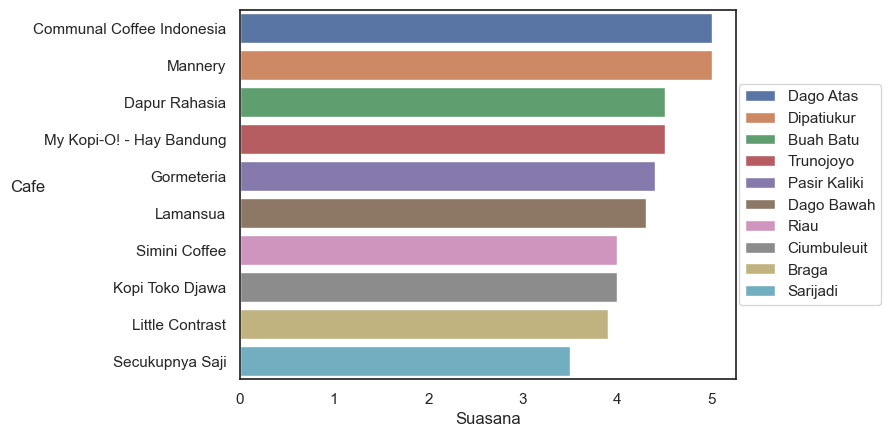

In [12]:
rating_suasana = []
for val in list_top10:
    cafe = cafe_only[cafe_only["area"]==val]
    rating_suasana.append(cafe.loc[cafe["Suasana"].idxmax()])

vibes_df = pd.DataFrame(rating)
vibes_df = vibes_df.sort_values(by="Suasana", ascending=False)

fig,ax_vibes = plt.subplots()
sns.barplot(data=vibes_df, y="name", x="Suasana",orient='h', hue="area", ax=ax_vibes, dodge=False)

ax_vibes.set_ylabel("Cafe", rotation=0)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.5))

plt.show()

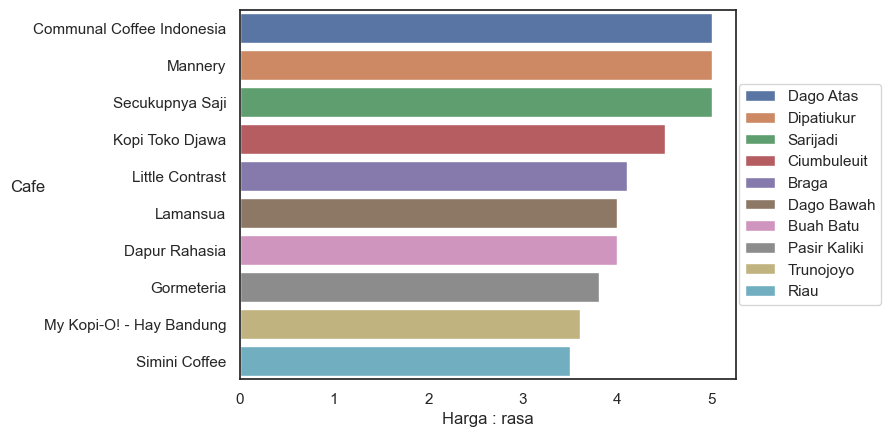

In [13]:
rating_worth = []
for val in list_top10:
    cafe = cafe_only[cafe_only["area"]==val]
    rating_worth.append(cafe.loc[cafe["Harga : rasa"].idxmax()])

worth_df = pd.DataFrame(rating)
worth_df = worth_df.sort_values(by="Harga : rasa", ascending=False)

fig,ax_worth = plt.subplots()
sns.barplot(data=worth_df, y="name", x="Harga : rasa",orient='h', hue="area", ax=ax_worth, dodge=False)

ax_worth.set_ylabel("Cafe", rotation=0)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.5))

plt.show()

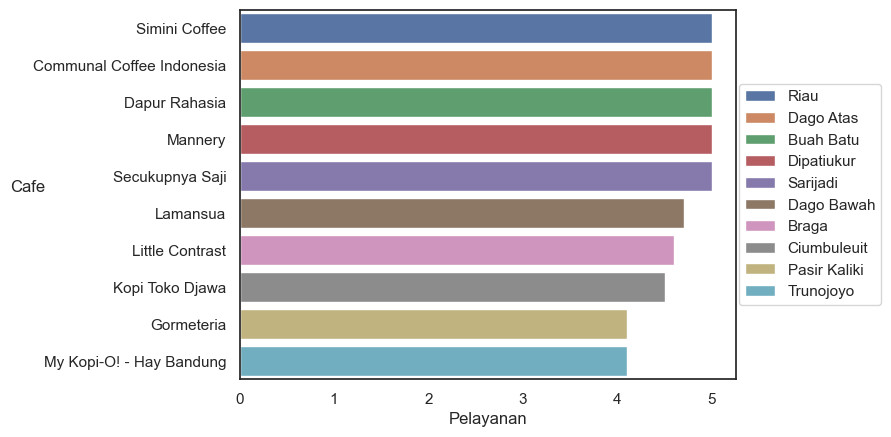

In [14]:
rating_service = []
for val in list_top10:
    cafe = cafe_only[cafe_only["area"]==val]
    rating_service.append(cafe.loc[cafe["Pelayanan"].idxmax()])

service_df = pd.DataFrame(rating)
service_df = service_df.sort_values(by="Pelayanan", ascending=False)

fig,ax_service = plt.subplots()
sns.barplot(data=service_df, y="name", x="Pelayanan",orient='h', hue="area", ax=ax_service, dodge=False)

ax_service.set_ylabel("Cafe", rotation=0)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.5))

plt.show()

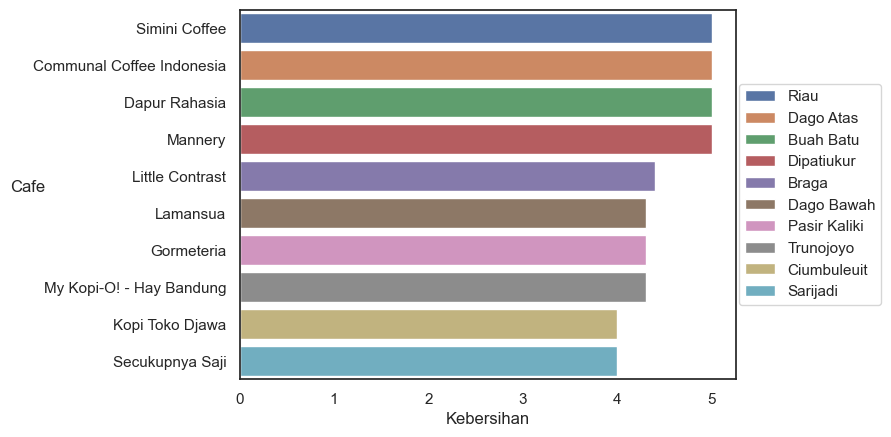

In [15]:
rating_clean = []
for val in list_top10:
    cafe = cafe_only[cafe_only["area"]==val]
    rating_clean.append(cafe.loc[cafe["Kebersihan"].idxmax()])

clean_df = pd.DataFrame(rating)
clean_df = clean_df.sort_values(by="Kebersihan", ascending=False)

fig,ax_clean = plt.subplots()
sns.barplot(data=clean_df, y="name", x="Kebersihan",orient='h', hue="area", ax=ax_clean, dodge=False)

ax_clean.set_ylabel("Cafe", rotation=0)

plt.legend(loc='center', bbox_to_anchor=(1.15,0.5))

plt.show()

## list cafe with full cashless method

In [16]:
print(len(cafe_only))
cashless_cafe = []
for idx,row in cafe_only.iterrows():
    payment = row["Pembayaran"].split(",")
    # print(payment)
    if "Tunai" not in row["Pembayaran"]:
        cashless_cafe.append(row)
cashless_cafe_df = pd.DataFrame(cashless_cafe)
cashless_cafe_df

571


,name,alamat,spend_range,overall_rating,Tipe Kuliner,Jam Buka,Pembayaran,facility,Rasa,Suasana,Harga : rasa,Pelayanan,Kebersihan,area
41,Masagi Koffee,"Jl. Gunung Kareumbi No. 1B, Ciumbuleuit, Bandung",Di bawah Rp. 50.000,4.17,Kafe,Senin - Minggu (07:00 - 21:00),"Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.2,4.8,3.8,3.9,4.2,Ciumbuleuit
163,SORAI,"Jl. Serayu No. 10, Riau, Bandung",Di bawah Rp. 50.000,4.24,Kafe,"Senin - Jumat (08:00 - 20:00), Sabtu - Minggu ...","Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.0,4.4,3.9,4.6,4.3,Riau
179,Nomina Public,"Jl. Kemuning No. 17, Riau, Bandung",Di bawah Rp. 50.000,4.12,Kafe,"Senin - Kamis (10:00 - 21:30), Jumat (13:00 - ...","Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",4.0,4.1,4.5,4.0,4.0,Riau
599,Gang Nikmat,"Jl. Cihapit No. 6 (Gang Masjid istiqamah), Ria...",Di bawah Rp. 50.000,3.72,Kafe,Senin - Minggu (09:00 - 21:00),"Debet, Go-pay, Ovo, Dana","[Area merokok, Area outdoor, 100% Halal, Bisa ...",4.1,3.5,3.7,3.7,3.6,Riau
871,Kopi Toko Djawa,"Jl. Buah Batu No. 163, Buah Batu, Bandung",Di bawah Rp. 50.000,4.04,Kafe,"Senin - Jumat (09:00 - 21:00), Sabtu - Minggu ...","Visa, Master, Debet, Go-pay, Ovo, Dana","[Wifi, Area merokok, Area outdoor, 100% Halal,...",3.6,4.2,4.2,3.8,4.4,Buah Batu
883,Kanoko Coffee,2510 Indekost/Roetjiin\n Jl. ...,Di bawah Rp. 50.000,3.96,Kafe,Senin - Minggu (07:00 - 21:00),"Debet, Go-pay, Ovo, Dana","[Wifi, Pesan antar, Area merokok, Area outdoor...",3.8,4.6,3.6,4.0,3.8,Dago Atas


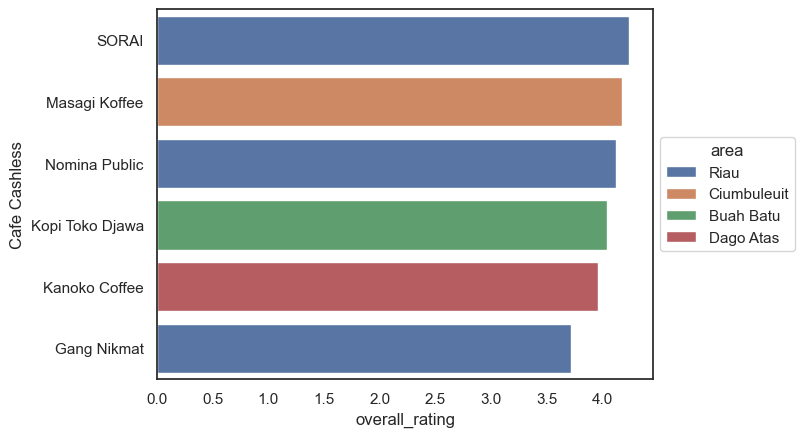

In [17]:
asc_cashless = cashless_cafe_df.sort_values(by="overall_rating", ascending=False)
ax_cashless = sns.barplot(asc_cashless, y="name", x="overall_rating", hue="area", dodge=False)

# for i,v in enumerate(cafe_area["area"]):
#     ax_cashless.text(i, v, v, ha="center")

# ax_cashless.set_xticklabels(ax_cashless.get_xticklabels(), rotation=45)
ax_cashless.set_ylabel("Cafe Cashless")
plt.legend(loc='center', bbox_to_anchor=(1.15,0.5), title="area")

## Show cafe spend range in each area

In [18]:
cafe_only["spend_range"].value_counts()

Di bawah Rp. 50.000          329
Rp. 50.000 - Rp. 100.000     229
Rp. 100.000 - Rp. 200.000     13
Name: spend_range, dtype: int64

In [19]:
cafe_riau = cafe_only[cafe_only["area"]=="Riau"]
cafe_riau.value_counts("spend_range")
# cafe_riau

spend_range
Di bawah Rp. 50.000          33
Rp. 50.000 - Rp. 100.000     31
Rp. 100.000 - Rp. 200.000     4
dtype: int64

           area  low_spend <50k  mid_spend 50k-100k  high_spend >100k
0          Riau              33                  31                 4
1     Dago Atas              29                  18                 1
2    Dago Bawah              14                  16                 0
3     Buah Batu              24                   5                 0
4    Dipatiukur              15                  12                 0
5   Ciumbuleuit              11                   6                 1
6         Braga              12                   5                 0
7  Pasir Kaliki               7                   6                 0
8     Trunojoyo               7                   6                 0
9      Sarijadi               7                   5                 0


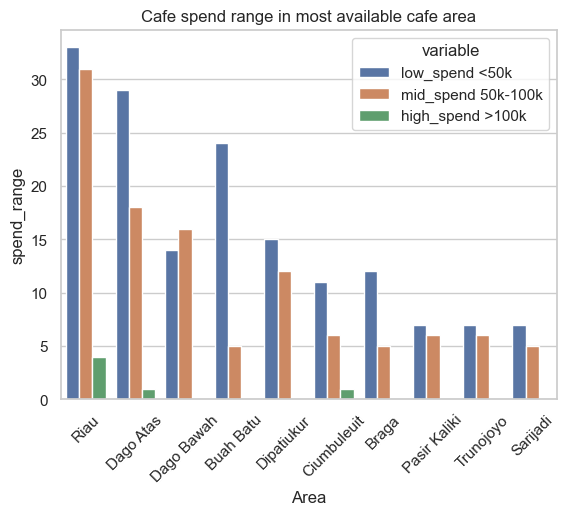

In [20]:
low_spend = pd.DataFrame(columns=["area", "low_spend <50k", "mid_spend 50k-100k", "high_spend >100k"])

for idx,val in enumerate(list_top10):
    spend_dict = {}
    area = cafe_only[cafe_only["area"]==val]
    low_df = area[area["spend_range"]=="Di bawah Rp. 50.000"].spend_range.value_counts().to_list()
    mid_df = area[area["spend_range"]=="Rp. 50.000 - Rp. 100.000"].spend_range.value_counts().to_list()
    high_df = area[area["spend_range"]=="Rp. 100.000 - Rp. 200.000"].spend_range.value_counts().to_list()
    spend_dict["area"] = val
    if low_df:
        spend_dict["low_spend <50k"] = low_df[0]
    else:
        spend_dict["low_spend <50k"] = 0
    if mid_df:
        spend_dict["mid_spend 50k-100k"] = mid_df[0]
    else:
        spend_dict["mid_spend 50k-100k"] = 0
    if high_df:
        spend_dict["high_spend >100k"] = high_df[0]
    else:
        spend_dict["high_spend >100k"] = 0
    low_spend.loc[idx] = spend_dict

print(low_spend)
sns.set(style="whitegrid")
ax_spend = sns.barplot(x="area", y="value", hue="variable", data=pd.melt(low_spend, id_vars=["area"], value_vars=["low_spend <50k", "mid_spend 50k-100k", "high_spend >100k"]))

# for i,v in enumerate(low_spend["area"]):
#     ax_spend.text(i, v+1, v, ha="center")

ax_spend.set_xticklabels(ax_spend.get_xticklabels(), rotation=45)
ax_spend.set_title("Cafe spend range in most available cafe area")
ax_spend.set_xlabel("Area")
ax_spend.set_ylabel("spend_range")

plt.show()

## average rating for each category in each area

[Text(0, 0, 'Riau'),
 Text(1, 0, 'Dago Atas'),
 Text(2, 0, 'Dago Bawah'),
 Text(3, 0, 'Buah Batu'),
 Text(4, 0, 'Dipatiukur'),
 Text(5, 0, 'Ciumbuleuit'),
 Text(6, 0, 'Braga'),
 Text(7, 0, 'Pasir Kaliki'),
 Text(8, 0, 'Trunojoyo'),
 Text(9, 0, 'Sarijadi')]

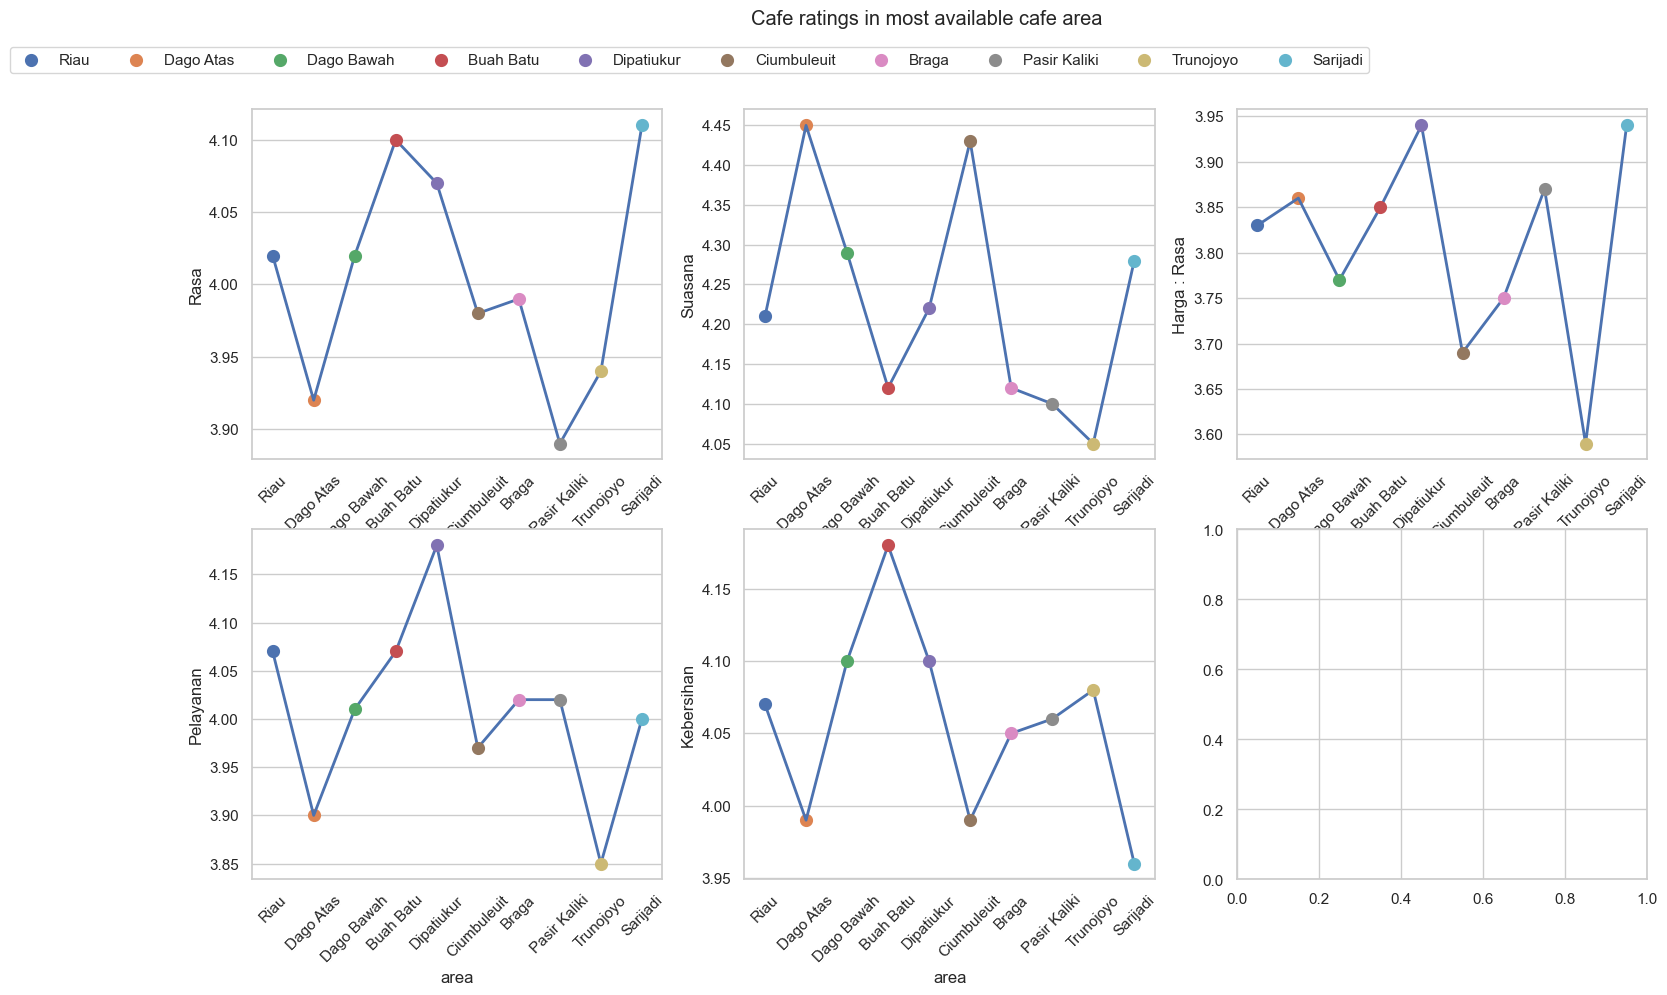

In [60]:
rating_all_df = pd.DataFrame(columns=["area", "Rasa", "Suasana", "Harga : Rasa", "Pelayanan", "Kebersihan"])

for idx, val in enumerate(list_top10):
    area_rating = {}
    area = cafe_only[cafe_only["area"]==val]
    area_rating["area"] = val
    area_rating["Rasa"] = round(area["Rasa"].mean(), 2)
    area_rating["Suasana"] = round(area["Suasana"].mean(), 2)
    area_rating["Harga : Rasa"] = round(area["Harga : rasa"].mean(), 2)
    area_rating["Pelayanan"] = round(area["Pelayanan"].mean(), 2)
    area_rating["Kebersihan"] = round(area["Kebersihan"].mean(), 2)
    rating_all_df.loc[idx] = area_rating
# print(rating_all_df)

#plot data

#create figure and axis object
fig, ax_rating = plt.subplots(2,3, figsize=(18,10))
fig.set_alpha(0.1)
fig.suptitle("Cafe ratings in most available cafe area")

sns.pointplot(x='area', y='Rasa', data=rating_all_df, ax=ax_rating[0,0], hue='area',join=True, markers=".", scale=1.75, linestyles="-")
sns.pointplot(x='area', y='Rasa', data=rating_all_df, ax=ax_rating[0,0], markers=".", scale=0.75)
sns.pointplot(x='area', y='Suasana', data=rating_all_df, ax=ax_rating[0,1], hue='area',join=True, markers=".", scale=1.75, linestyles="-")
sns.pointplot(x='area', y='Suasana', data=rating_all_df, ax=ax_rating[0,1], markers=".", scale=0.75)
sns.pointplot(x='area',y='Harga : Rasa', data=rating_all_df, ax=ax_rating[0,2], hue='area',join=True, markers=".", scale=1.75, linestyles="-")
sns.pointplot(x='area', y='Harga : Rasa', data=rating_all_df, ax=ax_rating[0,2], markers=".", scale=0.75)
sns.pointplot(x='area',y='Pelayanan', data=rating_all_df, ax=ax_rating[1,0], hue='area',join=True, markers=".", scale=1.75, linestyles="-")
sns.pointplot(x='area', y='Pelayanan', data=rating_all_df, ax=ax_rating[1,0], markers=".", scale=0.75)
sns.pointplot(x='area',y='Kebersihan', data=rating_all_df, ax=ax_rating[1,1], hue='area',join=True, markers=".", scale=1.75, linestyles="-")
sns.pointplot(x='area', y='Kebersihan', data=rating_all_df, ax=ax_rating[1,1], markers=".", scale=0.75)



ax_rating[0,0].get_legend().remove()
ax_rating[0,1].get_legend().remove()
ax_rating[0,2].get_legend().remove()
ax_rating[1,0].get_legend().remove()
ax_rating[1,1].get_legend().remove()

handles, labels = ax_rating[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=10, bbox_to_anchor=(.75, 0.95))

ax_rating[0,0].set_xticklabels(ax_rating[0,0].get_xticklabels(), rotation=45)
ax_rating[0,1].set_xticklabels(ax_rating[0,1].get_xticklabels(), rotation=45)
ax_rating[0,2].set_xticklabels(ax_rating[0,2].get_xticklabels(), rotation=45)
ax_rating[1,0].set_xticklabels(ax_rating[1,0].get_xticklabels(), rotation=45)
ax_rating[1,1].set_xticklabels(ax_rating[1,1].get_xticklabels(), rotation=45)
    

In [22]:
riau_df = cafe_only[cafe_only["area"]=="Riau"]
rata = round(riau_df["Rasa"].mean(), 2)
print(rata)

4.02
